In [1]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [2]:
import tensorflow as tf

In [3]:
import numpy as np

In [4]:
alpha = np.linspace(.1, 5., 100)

In [5]:
from yacoub.distributions import AlphaMu

In [6]:
alphamu = AlphaMu(3., 1.)

In [7]:
h = alphamu.rvs(alpha, size=1e5)

In [8]:
def lnlikelihood(alpha):
    return len(h) * np.log(alpha) - np.sum(h ** alpha) + alpha * np.sum(np.log(h))

In [9]:
logp = [lnlikelihood(a) for a in alpha]
logp = np.asarray(logp)

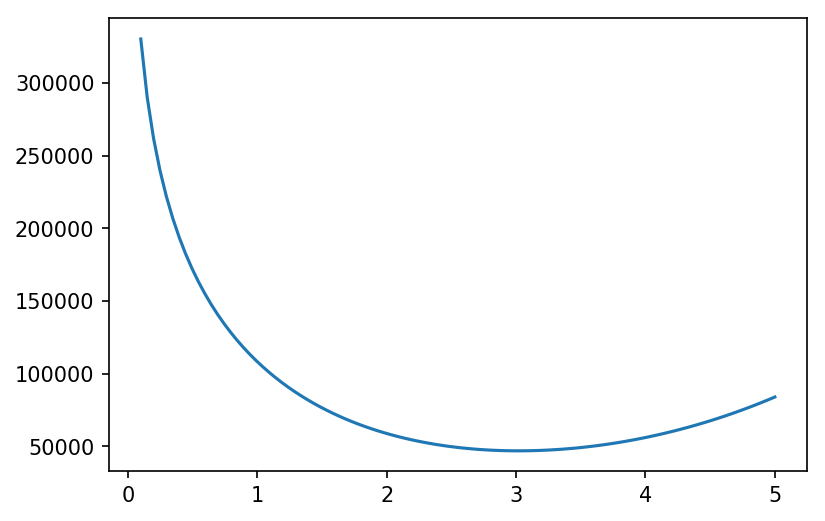

In [10]:
plt.plot(alpha, -logp)

In [11]:
a = tf.Variable(1., dtype=tf.float64)

In [12]:
def lnlikelihood_tf(alpha):
    return len(h) * tf.log(alpha) - tf.reduce_sum(h ** alpha) + alpha * tf.reduce_sum(np.log(h))

In [13]:
ll = -lnlikelihood_tf(a)

In [14]:
grad = tf.gradients(ll, [a])

In [15]:
sess = tf.Session()

In [16]:
sess.run(tf.global_variables_initializer())

In [17]:
sess.run(ll)

108340.25655963999

In [18]:
sess.run(grad)

[-84983.687821623666]

In [19]:
optimizer = tf.contrib.opt.ScipyOptimizerInterface(ll, var_list=[a])

In [20]:
optimizer.minimize(session=sess)

INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
  Objective function value: 46985.333316
  Number of iterations: 7
  Number of functions evaluations: 8


In [21]:
sess.run(a)

3.0180884706467253

In [22]:
sess.run(grad)

[-3.6937308323103935e-07]